# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



### Cargar librerías

In [586]:
import math as m
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar el dataset

In [587]:
df = pd.read_csv(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo1\Titanic\titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Información del dataset

In [588]:
print(df.columns,df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') None


## Tratamiento de los datos

#### 1. Valores nulos por columnas

In [589]:
total_filas = df.shape[0]

# Crear un DataFrame con el número total de valores nulos y el porcentaje de valores nulos por columna
datos_nulos = pd.DataFrame({'Total': df.isnull().sum(), 'Porcentaje': (df.isnull().sum()/total_filas)*100})

print('\n'"El número total de filas (pasajeros) es:", total_filas)

print('\n' 'Resumen de valores nulos:')
datos_nulos.head(12)



El número total de filas (pasajeros) es: 891

Resumen de valores nulos:


,Total,Porcentaje
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


### 2. Limpieza de columnas

Debemos decidir qué hacer en cada caso con los valores nulos de las columnas.

##### 2.1 Columna edad

Un análisis descriptivo superficial de la edad de los pasajeros nos permitirá decidir si emplear la media o la mediana como estimador de las edades desconocidas. 

La edad mínima es: 0
La edad máxima es: 80
La edad media es: 29.69911764705882
La edad mediana es: 28.0


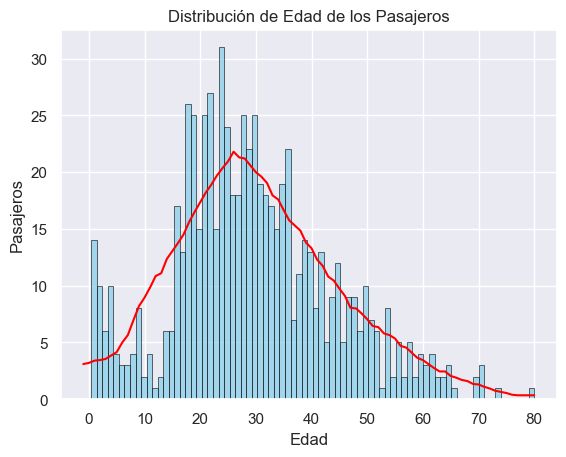

El coeficiente de asimetría de la edad es: 0.3882898514698657


In [590]:
edad_min = int(df['Age'].min())
edad_max = int(df['Age'].max())
anios = edad_max - edad_min
anios = int(anios)
edad_media = df['Age'].mean()
edad_mediana = df['Age'].median()

print("La edad mínima es:", edad_min)
print("La edad máxima es:", edad_max)
print("La edad media es:", edad_media)
print("La edad mediana es:", edad_mediana)

#Función para suavizar los datos
def edades_en_rango(x):
    e = 10
    return (((df['Age'] >= x-e) & (df['Age'] <= x+e)).sum())/(2*e)

# Valores de x para los cuales calcular la función suavizante
x_values = range(edad_min - 1, edad_max + 1)

# Proporción de pasajeros en un rango alrededor de cada valor de x
funciones_edades = [edades_en_rango(x) for x in x_values]

#Representamos la distribución de la edad junto con la función 'suavizante'
sns.histplot(df['Age'], bins=anios, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Pasajeros')
plt.title('Distribución de Edad de los Pasajeros')

plt.plot(x_values, funciones_edades, color='red', label='f(x)')

plt.show()

from scipy.stats import skew

coef_asim = skew(df['Age'].dropna())

print("El coeficiente de asimetría de la edad es:", coef_asim)


La distribución de los edades es razonablemente simétrica -- el coeficiente de asimetría de los datos es pequeño --, aunque existen abundantes valores extremos (muchos bebes), por lo que la mediana es el mejor estimador. Usamos la mediana para completar los valores nulos.

In [591]:
df['Age'].fillna(edad_mediana, inplace=True)

C:\Users\34699\AppData\Local\Temp\ipykernel_30496\1783673952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(edad_mediana, inplace=True)


##### 2.2 Columna cabina

In [404]:
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


No tiene ningún sentido aventurarnos a determinar qué cabina ocupaban los pasajeros para los cuales es desconocida, ni siquiera disponemos de una lista exhaustiva de las cabinas del barco. Sin embargo, del número de cada cabina podemos extraer la cubierta del barco en que se hallaba -- basta tomar la letra del código --. 
Por otra parte, la clase de los pasajeros es conocida en todos los casos. Teniendo en cuenta que las distintas cubiertas servían para alojar a pasajeros de distintas clases, sí podemos aventuranos a determinar la cubierta en que se hallaban las cabinas que desconocemos. Además, la cubierta del pasajero sí es relevante a la hora de estudiar sus probabilidades de supervivencia.

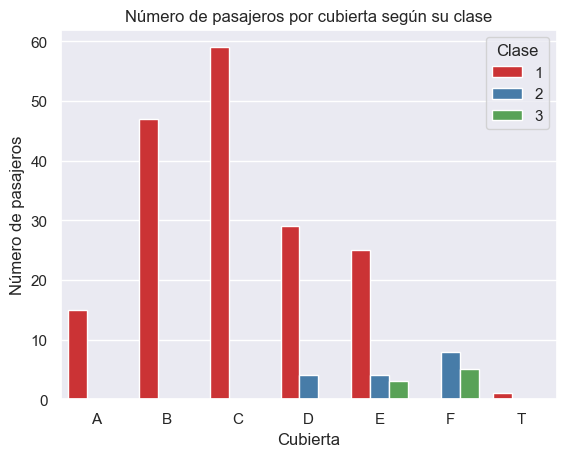

In [405]:
#creamos la columna Cubierta
df['Cubierta'] = df['Cabin'].str[0] 

order = ['A', 'B', 'C', 'D', 'E', 'F', 'T']


sns.countplot(data=df, x='Cubierta', hue='Pclass', palette='Set1', order=order)
plt.xlabel('Cubierta')
plt.ylabel('Número de pasajeros')
plt.title('Número de pasajeros por cubierta según su clase')
plt.legend(title='Clase')
plt.show()


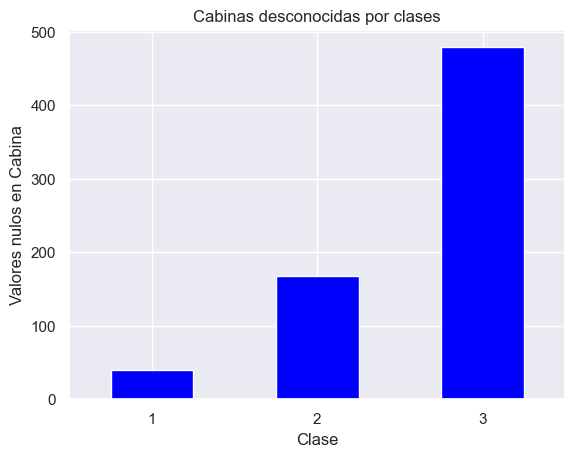

In [406]:
# Creamos la columna 'Cab_null' con 0 si 'Cabin' es conocido y 1 si es desconocido
df['Cab_null'] = df['Cabin'].isnull()

nulos_por_clase = df.groupby('Pclass')['Cab_null'].sum()

nulos_por_clase.plot(kind='bar', color='blue')
plt.xlabel('Clase')
plt.ylabel('Valores nulos en Cabina')
plt.title('Cabinas desconocidas por clases')
plt.xticks(rotation=0)
plt.show()

Para completar los valores nulos de Cubierta lo que hacemos es elegir aleatoriamente un valor de entre los posibles con probabilidad dada por la clase del pasajero. Primero generamos un dataframe con el total y la proporción de pasajeros de cada clase en cada cubierta, estas últimas nos dan las probabilidades con las que debemos generar los valores desconocidos de Cubierta.

In [417]:
# Crear nuevas columnas C1, C2, C3 y asignarles valor inicial de 0
df['C1'] = 0
df['C2'] = 0
df['C3'] = 0

# Asignar valor 1 en las columnas correspondientes según la clase del pasajero
df.loc[df['Pclass'] == 1, 'C1'] = 1
df.loc[df['Pclass'] == 2, 'C2'] = 1
df.loc[df['Pclass'] == 3, 'C3'] = 1


clases_por_cubierta=pd.DataFrame()

#Nuevo dataframe, total de pasajeros de cada clase por cubierta y proporción de pasajeros de cada clase en ella
clases_por_cubierta['T1'] = df.groupby('Cubierta')['C1'].sum()
clases_por_cubierta['T2'] = df.groupby('Cubierta')['C2'].sum()
clases_por_cubierta['T3'] = df.groupby('Cubierta')['C3'].sum()

# Total de pasajeros por clase (cubierta conocida)
total_clase1 = clases_por_cubierta['T1'].sum()
total_clase2 = clases_por_cubierta['T2'].sum()
total_clase3 = clases_por_cubierta['T3'].sum()


# Calcular las proporciones de pasajeros de cada clase por cubierta
clases_por_cubierta['P1'] = clases_por_cubierta['T1'] / total_clase1
clases_por_cubierta['P2'] = clases_por_cubierta['T2'] / total_clase2
clases_por_cubierta['P3'] = clases_por_cubierta['T3'] / total_clase3

print(clases_por_cubierta.head(7))


# Condiciones en las que se retornarán valores aleatorios en la columna 'Cubierta'
def rellenar_cubierta(row):
    if pd.isnull(row['Cubierta']):
        if row['Pclass'] == 1:
            return np.random.choice(clases_por_cubierta.index, p=clases_por_cubierta['P1'])
        elif row['Pclass'] == 2:
            return np.random.choice(clases_por_cubierta.index, p=clases_por_cubierta['P2'])
        else:  # Pclass == 3
            return np.random.choice(clases_por_cubierta.index, p=clases_por_cubierta['P3'])
    return row['Cubierta']

# Aplicamos la función rellenar_cubierta sólo a los valores nulos 
df['Cubierta'] = df.apply(lambda x: rellenar_cubierta(x) if pd.isnull(x['Cubierta']) else x['Cubierta'], axis=1)



          T1  T2   T3        P1        P2        P3
Cubierta                                           
A         19   0    0  0.087963  0.000000  0.000000
B         55   0    0  0.254630  0.000000  0.000000
C         76   0    0  0.351852  0.000000  0.000000
D         32  56    0  0.148148  0.304348  0.000000
E         33  49  113  0.152778  0.266304  0.230143
F          0  79  191  0.000000  0.429348  0.389002
G          0   0  187  0.000000  0.000000  0.380855


##### 2.3. Columna Embarked

Siendo sólo dos valores los desconocidos, simplemente los completamos con la moda.

In [418]:
moda_embarked = df['Embarked'].mode()[0]
print("La moda de la columna 'Embarked' es:", moda_embarked)


df['Embarked'].fillna(moda_embarked, inplace=True)

La moda de la columna 'Embarked' es: S


C:\Users\34699\AppData\Local\Temp\ipykernel_30496\1917485469.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(moda_embarked, inplace=True)


## Probabilidad de sobrevivir.

En lo que sigue trataremos de estudiar las probabilidades de supervivencia de los pasajeros en función de la información disponible. Comenzamos representando gráficamente las probabilidades de supervivencia en función de los datos significativos. 

#### 1. Factores económicos: La clase del pasajero, el precio de su billete y la cubierta de su cabina

La clase:

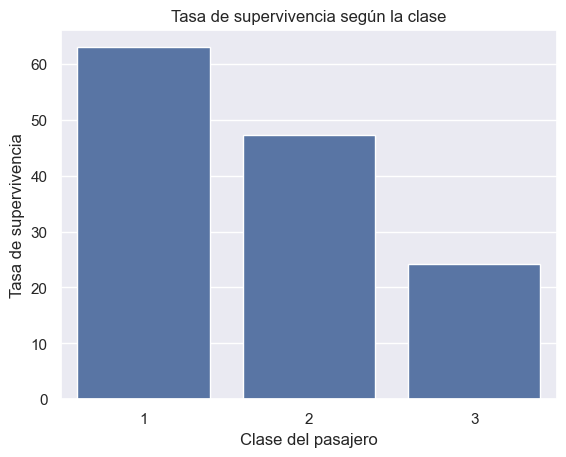

In [419]:
# Calculate the survival rates by passenger class 
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100 

sns.barplot(x=survival_by_class.index, y=survival_by_class.values) 
plt.xlabel('Clase del pasajero') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia según la clase') 
plt.show()

El precio del billete:

El precio mínimo es: 0
El precio máximo es: 512


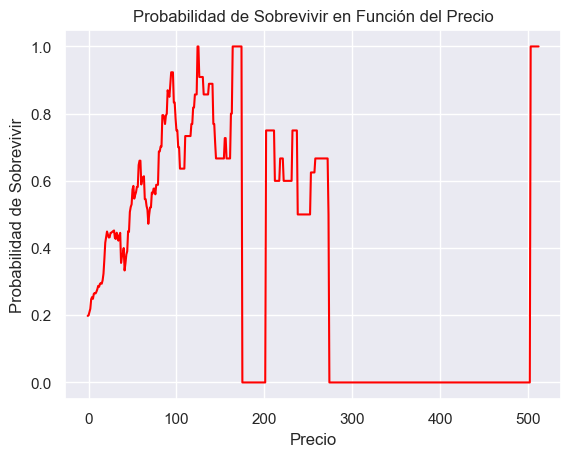

In [420]:
precio_min = int(df['Fare'].min())
precio_max = int(df['Fare'].max())
rg_precio = precio_max - precio_min
precio_medio = df['Fare'].mean()
precio_mediano = df['Fare'].median()
precio_moda = df['Fare'].mode()[0]

print("El precio mínimo es:", precio_min)
print("El precio máximo es:", precio_max)


# Función para calcular la probabilidad de sobrevivir en un rango de precios
def probabilidad_sobrevivir_en_rango(x):
    e = 10
    num_sobrevivientes = ((df['Fare'] >= x-e) & (df['Fare'] <= x+e) & (df['Survived'] == 1)).sum()
    num_pasajeros_en_rango = ((df['Fare'] >= x-e) & (df['Fare'] <= x+e)).sum()
    return num_sobrevivientes / num_pasajeros_en_rango if num_pasajeros_en_rango > 0 else 0


# Valores de x 
x_values = range(precio_min-1, precio_max+1)

# Proporción de supervivientes en un rango de precio alrededor de cada valor de x
probsub = [probabilidad_sobrevivir_en_rango(x) for x in x_values]


# Crear un gráfico con las probabilidades de sobrevivir en función del precio

plt.xlabel('Precio')
plt.ylabel('Probabilidad de Sobrevivir')
plt.title('Probabilidad de Sobrevivir en Función del Precio')


plt.plot(x_values, probsub, color='red', label='f(x)')
plt.show()



C:\Users\34699\AppData\Local\Temp\ipykernel_30496\464281957.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sup_por_rgprecio = df.groupby('RgPrecio')['Survived'].mean()


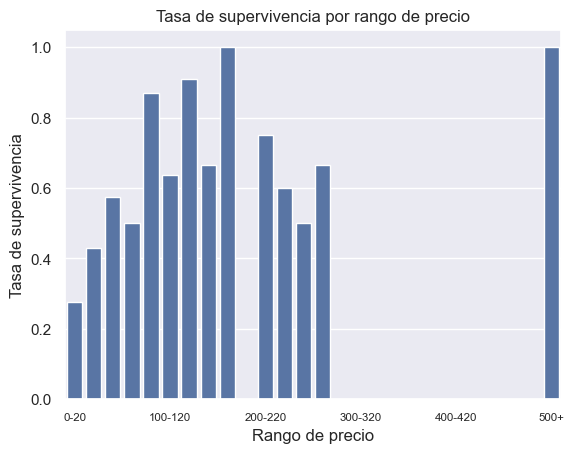

In [324]:
# Creamos los grupos de precios y los etiquetamos 
precio_bins=range(precio_min, precio_max + 10, 20)
precio_labels = [f'{precio_bins[i]}-{precio_bins[i+1]}' for i in range(len(precio_bins)-1)]
precio_labels[-1] = f'{precio_bins[-2]}+'
# Columna con los rangos de precios
df['RgPrecio'] = pd.cut(df['Fare'], bins=precio_bins, labels=precio_labels, right=False) 
# Tasa de supervivenciapor grupos
sup_por_rgprecio = df.groupby('RgPrecio')['Survived'].mean() 
# Representamos

sns.barplot(x=sup_por_rgprecio.index, 
            y=sup_por_rgprecio.values) 
plt.xlabel('Rango de precio') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia por rango de precio')

x_ticks = np.arange(0, len(sup_por_rgprecio.index), 1) 
x_labels = [label if i % 5 == 0 else '' for i, label in enumerate(sup_por_rgprecio.index)] # Obtener solo el inicio del intervalo


plt.xticks(x_ticks, x_labels, fontsize='x-small')

plt.show()

La cubierta:

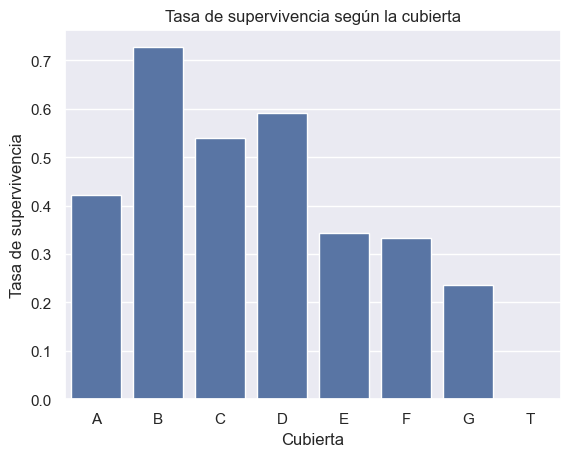

In [421]:
# Calculamos la tasa de supervivencia en función del sexo
sup_por_cub = df.groupby('Cubierta')['Survived'].mean() 
# La representamos

sns.barplot(x=sup_por_cub.index, y=sup_por_cub.values) 
plt.xlabel('Cubierta') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia según la cubierta') 
plt.show()

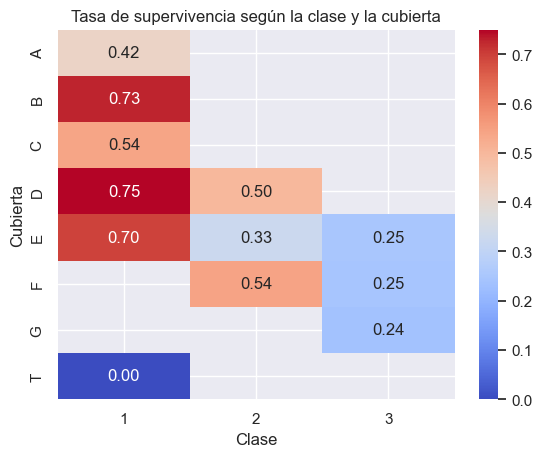

In [422]:
# Supervivencia por cubierta y clase

sup_por_cub_clas = df.groupby(['Cubierta','Pclass'])['Survived'].mean() 
 
#Rompe en columnas el índice compuesto ['Cubierta','Pclass']
sup_CuCl_plano = sup_por_cub_clas.unstack() 

#Representamos mediante un mapa de calor
sns.heatmap(data=sup_CuCl_plano, annot=True, cmap='coolwarm', fmt=".2f", cbar=True) 


plt.xlabel('Clase') 
plt.ylabel('Cubierta') 
plt.title('Tasa de supervivencia según la clase y la cubierta') 
plt.show()

#### 3. Factores biológicos: el sexo, la edad y la familia

Sexo:

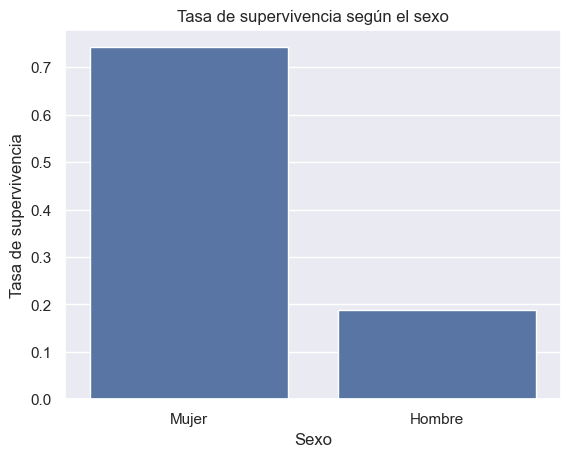

In [423]:
# Calculamos la tasa de supervivencia en función del sexo
sup_por_sexos = df.groupby('Sex')['Survived'].mean() 
# La representamos

sns.barplot(x=sup_por_sexos.index, y=sup_por_sexos.values) 
plt.xlabel('Sexo') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia según el sexo') 
plt.xticks([0,1], ['Mujer','Hombre'])
plt.show()

Edad:

C:\Users\34699\AppData\Local\Temp\ipykernel_30496\2606304032.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sup_por_grEdad = df.groupby('AgeGroup')['Survived'].mean()


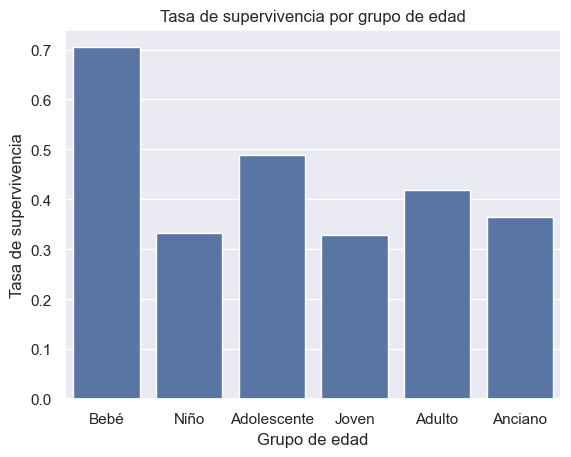

In [569]:

age_bins = [0, 6, 12, 18, 30, 50, 100] 

age_labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Anciano'] 

#Nueva columna con el grupo de edad
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False) 

sup_por_grEdad = df.groupby('AgeGroup')['Survived'].mean() 

# Lo representamos
sns.barplot(x=sup_por_grEdad.index, y=sup_por_grEdad.values) 
plt.xlabel('Grupo de edad') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia por grupo de edad') 
plt.show()

C:\Users\34699\AppData\Local\Temp\ipykernel_30496\4155503213.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sup_por_grEdad_sexo = df.groupby(['AgeGroup','Sex'])['Survived'].mean()


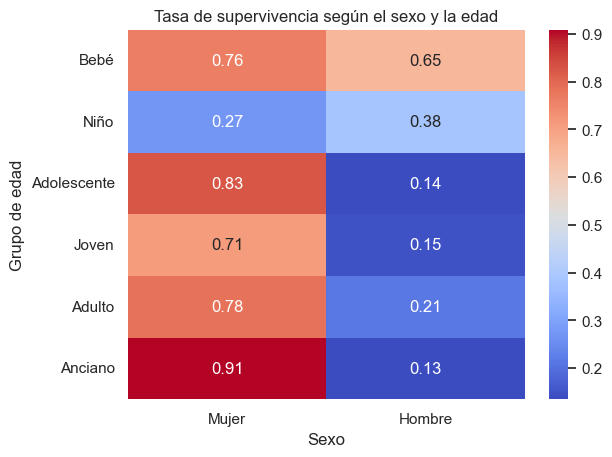

In [428]:

#Agrupamos por edad y sexo los datos y hacemos la media
sup_por_grEdad_sexo = df.groupby(['AgeGroup','Sex'])['Survived'].mean() 
 
#Rompe en columnas el índice compuesto ['AgeGroup','Sex']
sup_Ed_xx_plano = sup_por_grEdad_sexo.unstack() 

#Representamos mediante un mapa de calor

sns.heatmap(data=sup_Ed_xx_plano, annot=True, cmap='coolwarm', fmt=".2f", cbar=True) 

plt.xticks([0.5,1.5], ['Mujer','Hombre'])

plt.xlabel('Sexo') 
plt.ylabel('Grupo de edad') 
plt.title('Tasa de supervivencia según el sexo y la edad') 
plt.show()

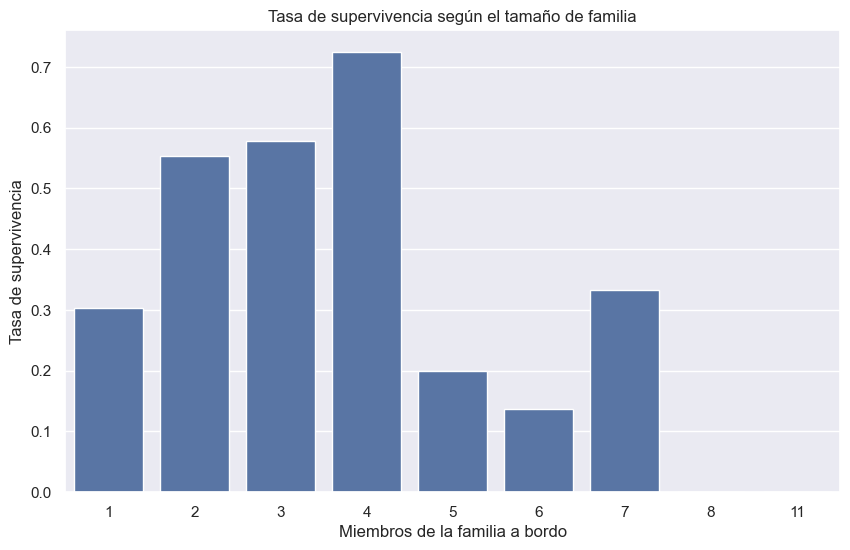

In [429]:
#Creamos una nueva columna con el número total de miembros de la familia a bordo: hermanos + hijos/padres + el propio pasajero
df['Familia'] = df['SibSp'] + df['Parch'] + 1 


# Calculamos y representamos las tasas de supervivencia en función del tamaño de familia
sup_por_fam = df.groupby('Familia')['Survived'].mean() 

plt.figure(figsize=(10, 6)) 
sns.barplot(x=sup_por_fam.index, y=sup_por_fam.values) 
plt.xlabel('Miembros de la familia a bordo') 
plt.ylabel('Tasa de supervivencia') 
plt.title('Tasa de supervivencia según el tamaño de familia') 
plt.show()
 

## Regresión logística

#### 1. Por edad

Solución encontrada:
b0 = -0.1694030468546919
b1 = -0.010362890098677297


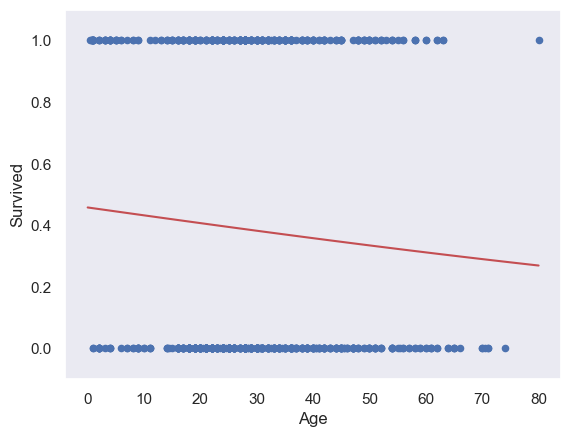

La precisión del modelo es de: 0.6161616161616161


In [600]:

#Función logística
def p(x, b0, b1):
    return 1 / (1 + m.exp(-(b0 + b1 * x)))


# Definir las funciones p_i(b0, b1) utilizando exec
for i in range(total_filas - 1):
    exec(f"def p_{i}(b0, b1): return p(df.iloc[{i}]['Age'], b0, b1)")


# Logaritmo de la función de verosimilitud con manejo de casos extremos
def ln_ver(b0, b1):
    suma = 0
    for i in range(total_filas-1):
        prob_i = globals()[f"p_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
        
        suma += y_i * m.log(prob_i) + (1 - y_i) * m.log(1 - prob_i)
    return suma

#Sus derivadas parciales respecto de b0 y b1

def partial_b0(b0,b1):
    suma = 0
    for i in range(total_filas-1):
        # Evaluar p_i(b0, b1) para cada fila i
        prob_i = globals()[f"p_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
    
        suma += (y_i - prob_i)
    return suma

def partial_b1(b0, b1):
    suma = 0
    for i in range(total_filas - 1):
        prob_i = globals()[f"p_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
        
        suma += (y_i - prob_i) * df.iloc[i]['Age']
    return suma


from scipy.optimize import fsolve

inicio_b0 = -0.5
inicio_b1 = -0.5


# Igualamos a 0 las derivadas parciales para hallar el máximo
def ecuaciones_a_resolver(x):
    eq1=partial_b0(x[0],x[-1])
    eq2=partial_b1(x[0],x[-1])
    return [eq1, eq2]

# Encuentra la solución
b0, b1 = fsolve(ecuaciones_a_resolver, [0,0])

# Añadir la columna 'Prediccion' al dataframe
df['Prediccion'] = df['Age'].apply(lambda age: 1 if p(age, b0, b1) >= 0.5 else 0)

# Calcular la precisión del modelo
aciertos = (df['Prediccion'] == df['Survived']).sum()
precision = aciertos / total_filas


print("Solución encontrada:")
print("b0 =", b0)
print("b1 =", b1)
# puntos de la recta
x = np.linspace(0,df['Age'].max(),100)
y = 1/(1+np.exp(-(b1*x+b0)))

# grafica de la recta
df.plot.scatter(x='Age',y='Survived')
plt.plot(x, y, 'r')
plt.ylim(-0.1,1.1)
plt.grid()
plt.show()

print('La precisión del modelo es de:', precision)



Lo adaptamos para estudiar los grupos en función del sexo

Solución encontrada (hombres):
b0 = -0.835465373348868
b1 = -0.02133591138759165
Solución encontrada (mujeres):
b0 = 0.5507234286271575
b1 = 0.01908001701222908


C:\Users\34699\AppData\Local\Temp\ipykernel_30496\2421200585.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Prediccion'] = df_male['Age'].apply(lambda age: 1 if p(age, b0m, b1m) >= 0.5 else 0)
C:\Users\34699\AppData\Local\Temp\ipykernel_30496\2421200585.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Prediccion'] = df_female['Age'].apply(lambda age: 1 if p(age, b0f, b1f) >= 0.5 else 0)


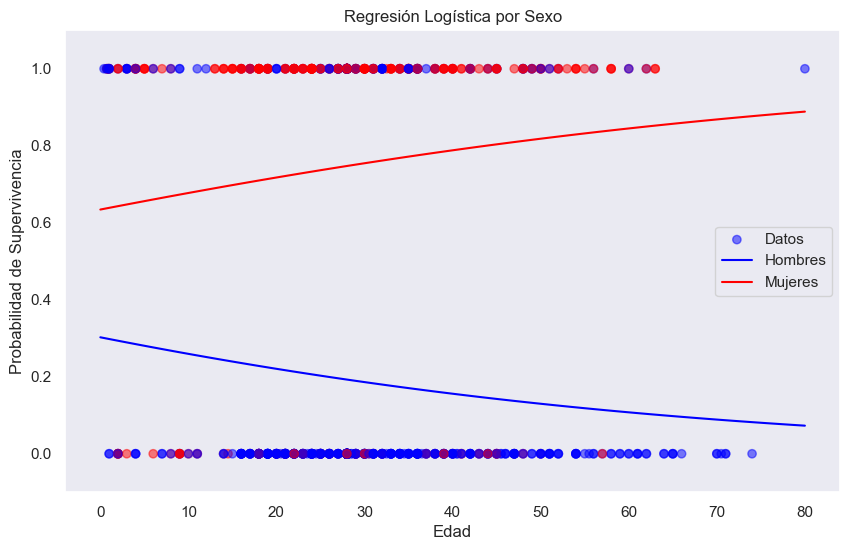

La precisión del modelo en hombres es de: 0.8110918544194108
La precisión del modelo en mujeres es de: 0.7420382165605095


In [602]:
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

total_filas_male=df_male.shape[0]
total_filas_female=df_female.shape[0]

# Definir las funciones pm_i(b0, b1) utilizando exec
for i in range(total_filas_male - 1):
    exec(f"def pm_{i}(b0, b1): return p(df_male.iloc[{i}]['Age'], b0, b1)")
    
for i in range(total_filas_female - 1):
    exec(f"def pf_{i}(b0, b1): return p(df_female.iloc[{i}]['Age'], b0, b1)")
    

# Logaritmo de la función de verosimilitud 
def ln_ver_male(b0, b1):
    suma = 0
    for i in range(total_filas_male-1):
        prob_i = globals()[f"pm_{i}"](b0, b1)
        y_i = df_male.iloc[i]['Survived']
        
        suma += y_i * m.log(prob_i) + (1 - y_i) * m.log(1 - prob_i)
    return suma

#Sus derivadas parciales respecto de b0 y b1

def partial_b0_m(b0,b1):
    suma = 0
    for i in range(total_filas_male-1):
        # Evaluar p_i(b0, b1) para cada fila i
        prob_i = globals()[f"pm_{i}"](b0, b1)
        y_i = df_male.iloc[i]['Survived']
    
        suma += (y_i - prob_i)
    return suma

def partial_b0_f(b0,b1):
    suma = 0
    for i in range(total_filas_female-1):
        # Evaluar p_i(b0, b1) para cada fila i
        prob_i = globals()[f"pf_{i}"](b0, b1)
        y_i = df_female.iloc[i]['Survived']
    
        suma += (y_i - prob_i)
    return suma

def partial_b1_m(b0, b1):
    suma = 0
    for i in range(total_filas_male - 1):
        prob_i = globals()[f"pm_{i}"](b0, b1)
        y_i = df_male.iloc[i]['Survived']
        
        suma += (y_i - prob_i) * df_male.iloc[i]['Age']
    return suma

def partial_b1_f(b0, b1):
    suma = 0
    for i in range(total_filas_female - 1):
        prob_i = globals()[f"pf_{i}"](b0, b1)
        y_i = df_female.iloc[i]['Survived']
        
        suma += (y_i - prob_i) * df_female.iloc[i]['Age']
    return suma


from scipy.optimize import fsolve

inicio_b0 = -0.5
inicio_b1 = -0.5


# Igualamos a cero las derivadas parciales para hallar un máximo
def ecuaciones_a_resolver_m(x):
    eq1=partial_b0_m(x[0],x[-1])
    eq2=partial_b1_m(x[0],x[-1])
    return [eq1, eq2]

def ecuaciones_a_resolver_f(x):
    eq1=partial_b0_f(x[0],x[-1])
    eq2=partial_b1_f(x[0],x[-1])
    return [eq1, eq2]

# Encuentra la solución
b0m, b1m = fsolve(ecuaciones_a_resolver_m, [0,0])
b0f, b1f = fsolve(ecuaciones_a_resolver_f, [0,0])

# Añadir la columna 'Prediccion' al dataframe
df_male['Prediccion'] = df_male['Age'].apply(lambda age: 1 if p(age, b0m, b1m) >= 0.5 else 0)
# Añadir la columna 'Prediccion' al dataframe
df_female['Prediccion'] = df_female['Age'].apply(lambda age: 1 if p(age, b0f, b1f) >= 0.5 else 0)

# Calcular la precisión del modelo
aciertos_male = (df_male['Prediccion'] == df_male['Survived']).sum()
precision_male= aciertos_male / total_filas_male
aciertos_female = (df_female['Prediccion'] == df_female['Survived']).sum()
precision_female= aciertos_female / total_filas_female

print("Solución encontrada (hombres):")
print("b0 =", b0m)
print("b1 =", b1m)

print("Solución encontrada (mujeres):")
print("b0 =", b0f)
print("b1 =", b1f)



# Puntos de la recta
x = np.linspace(0, df['Age'].max(), 100)
y_male = 1 / (1 + np.exp(-(b1m * x + b0m)))
y_female = 1 / (1 + np.exp(-(b1f * x + b0f)))

# Gráfica de la recta
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Survived'], c=df['Sex'].map({'male': 'blue', 'female': 'red'}), alpha=0.5, label='Datos')
plt.plot(x, y_male, label='Hombres', color='blue')
plt.plot(x, y_female, label='Mujeres', color='red')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Supervivencia')
plt.title('Regresión Logística por Sexo')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

print('La precisión del modelo en hombres es de:', precision_male)
print('La precisión del modelo en mujeres es de:', precision_female)



In [576]:
# calculo de las predicciones
df['sigmoid'] = 1/(1+np.exp(-(df['Age']*w+b)))

# calculo de la funcion de error
df['loss_xi'] = -df['Survived']*np.log(df['sigmoid'])-(1-df['Survived'])*np.log(1-df['sigmoid'])
cost_j = df['loss_xi'].mean()

array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
params = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
params['w'] = np.round(params['w'], 6)
params['b'] = np.round(params['b'], 6)

def sum_error_params(params):
    df['sigmoid'] = 1/(1+np.exp(-(df['Age']*params['w']+params['b'])))
    df['loss_xi'] = -df['Age']*np.log(df['sigmoid'])-(1-df['Survived'])*np.log(1-df['sigmoid'])
    j_cost = df['loss_xi'].mean()
    return(j_cost)

params['error'] = params.apply(sum_error_params, axis=1)

def delta_j_w(w, b):
    df['sigmoid'] = 1/(1+np.exp(-(df['Age']*w+b)))
    df['partial_loss'] = (df['sigmoid']-df['Survived'])*df['Age']
    derivative = df['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    df['sigmoid'] = 1/(1+np.exp(-(df['Age']*w+b)))
    df['partial_loss'] = (df['sigmoid']-df['Survived'])
    derivative = df['partial_loss'].mean()
    return(derivative)

w_0 = -0.5
b_0 = -0.5

alpha_w = 0.001
alpha_b = 0.1

# Definir una función para calcular la norma
def calcular_norma(vector):
    return np.linalg.norm(vector)

# Bucle while para repetir hasta que la condición se cumpla
while True:
    # Calcular nuevos valores de w y b
    w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
    b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)
    
    # Calcular la diferencia en la norma entre pasos
    diferencia_norma = calcular_norma(np.array([w_new, b_new]) - np.array([w_0, b_0]))
    
    # Salir del bucle si se cumple la condición de tolerancia
    if diferencia_norma < 0.000000001:
        break
    
    # Actualizar w_0 y b_0 para el siguiente paso
    w_0 = w_new
    b_0 = b_new

print("Valores finales de w y b:")
print(w_0, b_0)


Valores finales de w y b:
-0.010396359387069141 -0.17023227822010237


#### 2. Por precio del billete

Solución encontrada:
b0 = -0.9388971755632363
b1 = 0.015166000662817912


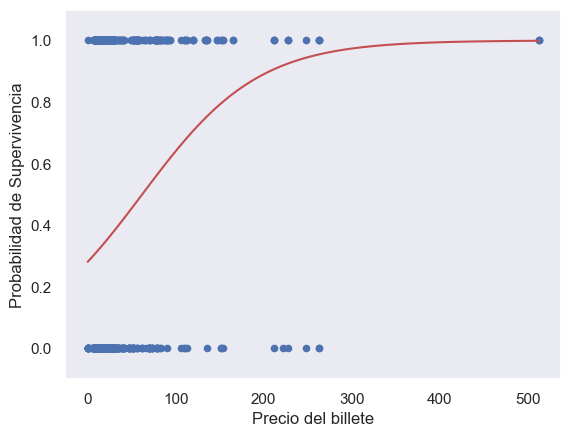

La precisión del modelo por precio es de: 0.6655443322109988


In [609]:


# Definir las funciones p2_i(b0, b1) utilizando exec
for i in range(total_filas - 1):
    exec(f"def p2_{i}(b0, b1): return p(df.iloc[{i}]['Fare'], b0, b1)")


# Logaritmo de la función de verosimilitud 
def ln_ver(b0, b1):
    suma = 0
    for i in range(total_filas-1):
        prob_i = globals()[f"p2_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
        
        suma += y_i * m.log(prob_i) + (1 - y_i) * m.log(1 - prob_i)
    return suma

#Sus derivadas parciales respecto de b0 y b1

def partial_b0_p(b0,b1):
    suma = 0
    for i in range(total_filas-1):
        # Evaluar p_i(b0, b1) para cada fila i
        prob_i = globals()[f"p2_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
        
        suma += (y_i - prob_i)
    return suma

def partial_b1_p(b0, b1):
    suma = 0
    for i in range(total_filas - 1):
        prob_i = globals()[f"p2_{i}"](b0, b1)
        y_i = df.iloc[i]['Survived']
        
        suma += (y_i - prob_i) * df.iloc[i]['Fare']
    return suma


inicio_b0 = 2
inicio_b1 = -0.5


# Igualamos a cero las parciales para hallar un máximo
def ecuaciones_a_resolver_p(x):
    eq1=partial_b0_p(x[0],x[-1])
    eq2=partial_b1_p(x[0],x[-1])
    return [eq1, eq2]

b0, b1 = fsolve(ecuaciones_a_resolver_p, [0,0])


# Añadir la columna 'Prediccion_porprecio' al dataframe
df['Prediccion_porprecio'] = df['Fare'].apply(lambda precio: 1 if p(precio, b0, b1) >= 0.5 else 0)

# Calcular la precisión del modelo
aciertos_p = (df['Prediccion_porprecio'] == df['Survived']).sum()
precision_p = aciertos_p / total_filas


print("Solución encontrada:")
print("b0 =", b0)
print("b1 =", b1)
# puntos de la recta
x = np.linspace(0,df['Fare'].max(),100)
y = 1/(1+np.exp(-(b1*x+b0)))

# grafica de la recta
df.plot.scatter(x='Fare',y='Survived')
plt.plot(x, y, 'r')
plt.ylim(-0.1,df['Survived'].max()*1.1)
plt.grid()
plt.xlabel('Precio del billete')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()

print('La precisión del modelo por precio es de:', precision_p)